# Inspect the Data
The dataset is retrieved from Kaggle, for more details [click here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data).

In [2]:
from typing import Tuple

import pandas as pd
import numpy as np

In [3]:
RAND_STATE_VALUE = 0
TRAIN_PATH = "datasets/train.csv"
TEST_PATH = "datasets/test.csv"
DATA_DESCRIPTION_PATH = "datasets/data_description.txt"

## Data Description

In [4]:
with open(DATA_DESCRIPTION_PATH, "r") as f:
    data_description = f.read()

In [5]:
print(data_description)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [6]:
def check_null(df: pd.DataFrame) -> Tuple[pd.DataFrame, list]:
    null_cols = df.columns[df.isnull().any()].to_list()
    null_df = pd.DataFrame(df.isnull().sum(), columns = ["null_count"])
    null_df["null_percentage"] = null_df["null_count"] / len(df)
    return null_df, null_cols

In [7]:
df_train = pd.read_csv(TRAIN_PATH)
df_test = pd.read_csv(TEST_PATH)

df_train = df_train.drop("Id", axis = 1)  

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [9]:
null_df, null_cols = check_null(df_train)
null_df.loc[null_cols].sort_values(by = "null_percentage", ascending = False)

,null_count,null_percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [10]:
df_train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# EDA and Visualization

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style = "darkgrid")

In [12]:
df_num = df_train.select_dtypes(include = ["int64", "float64"])
df_num.sample(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1188,60,68.0,8935,7,5,2002,2002,95.0,0,0,...,144,68,0,0,0,0,0,7,2009,195000
1098,50,50.0,6000,4,6,1936,1950,0.0,672,0,...,0,0,0,0,0,0,0,7,2009,128000
707,120,48.0,6240,8,5,2006,2006,176.0,863,0,...,192,38,0,0,0,0,0,12,2009,254000
446,20,137.0,16492,6,6,1966,2002,0.0,247,713,...,0,0,0,0,0,0,0,6,2010,190000
300,190,90.0,15750,5,5,1953,1953,56.0,841,0,...,0,0,0,0,0,0,0,6,2006,157000


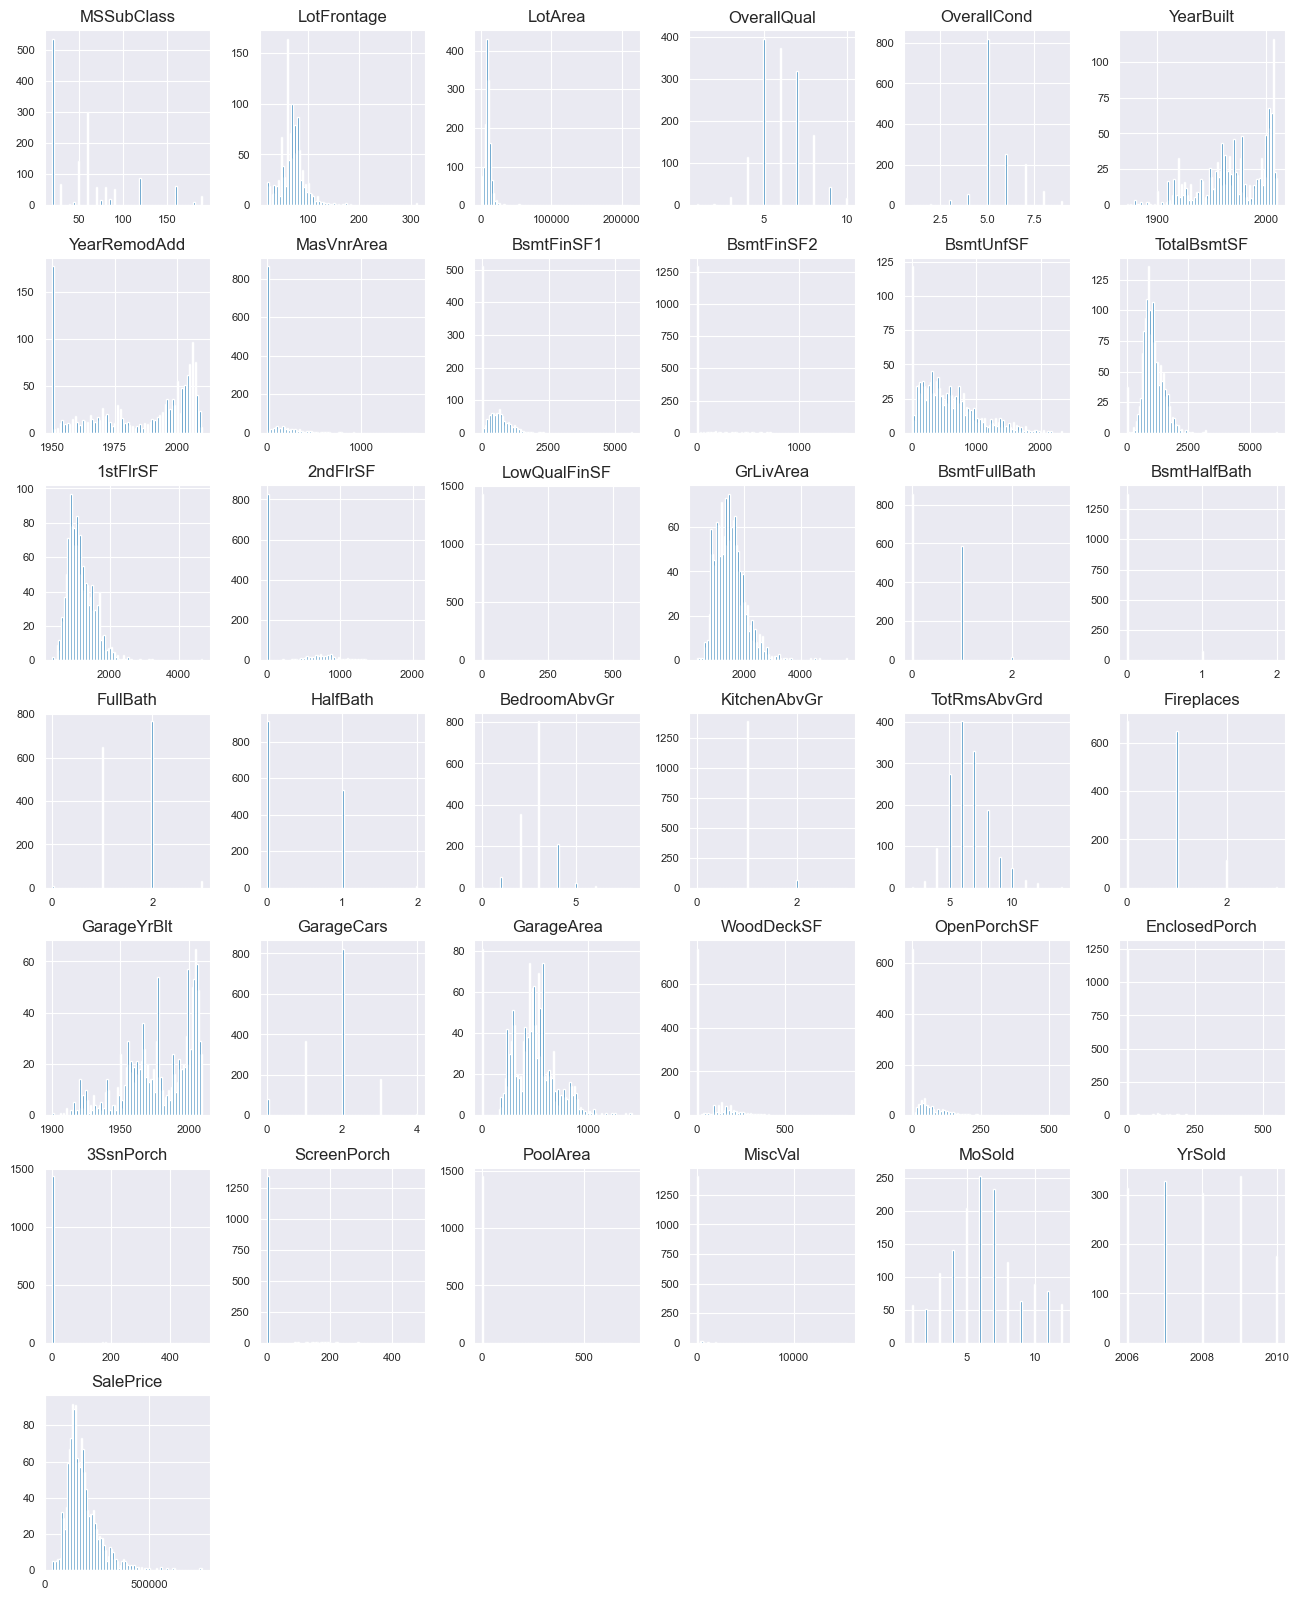

In [13]:
df_num.hist(figsize = (16, 20), bins = 100, xlabelsize = 8, ylabelsize = 8)
plt.show()

In [14]:
df_num["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness:  1.88


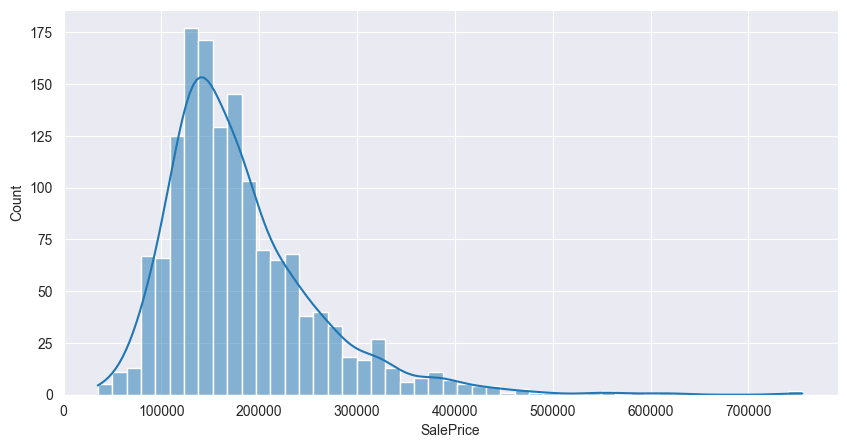

In [15]:
plt.figure(figsize = (10, 5))
sns.histplot(df_num["SalePrice"], kde = True)
print(f"Skewness: {df_num['SalePrice'].skew(): .2f}")
plt.show()

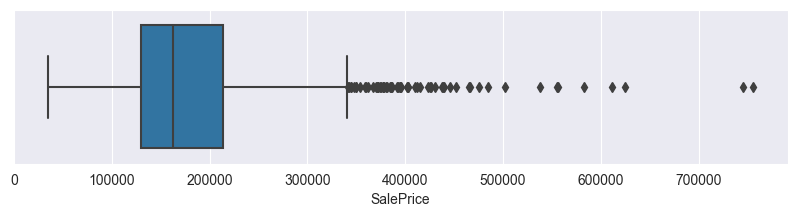

In [16]:
plt.figure(figsize = (10, 2))
sns.boxplot(x = df_num["SalePrice"])
plt.show()

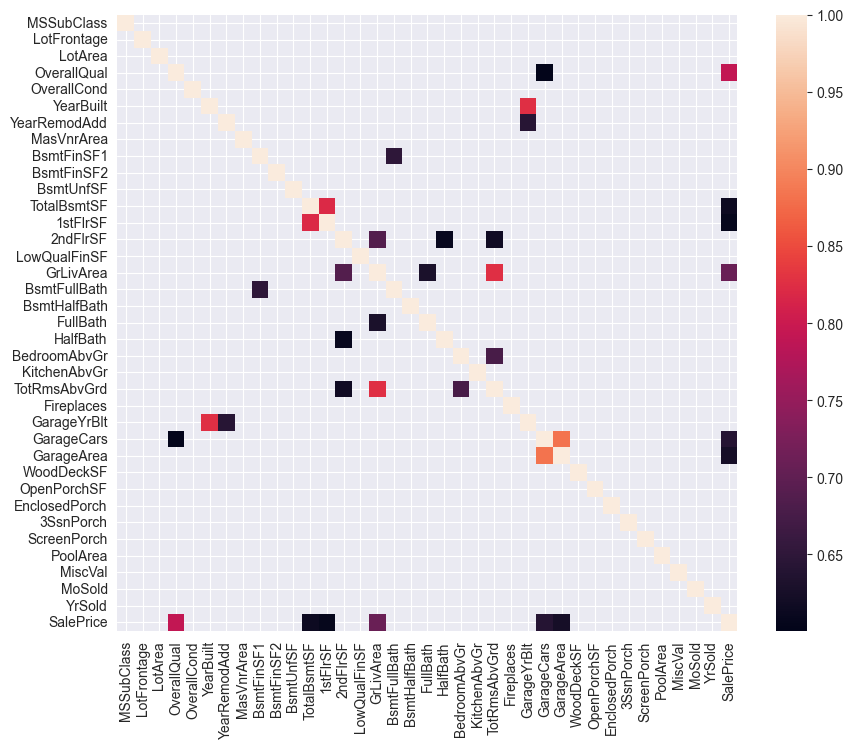

In [17]:
plt.figure(figsize = (10, 8))
sns.heatmap(df_num.corr(), mask = df_num.corr() < 0.6)
plt.show()

In [18]:
correlation = df_num.corrwith(df_num["SalePrice"]).sort_values(ascending = False)

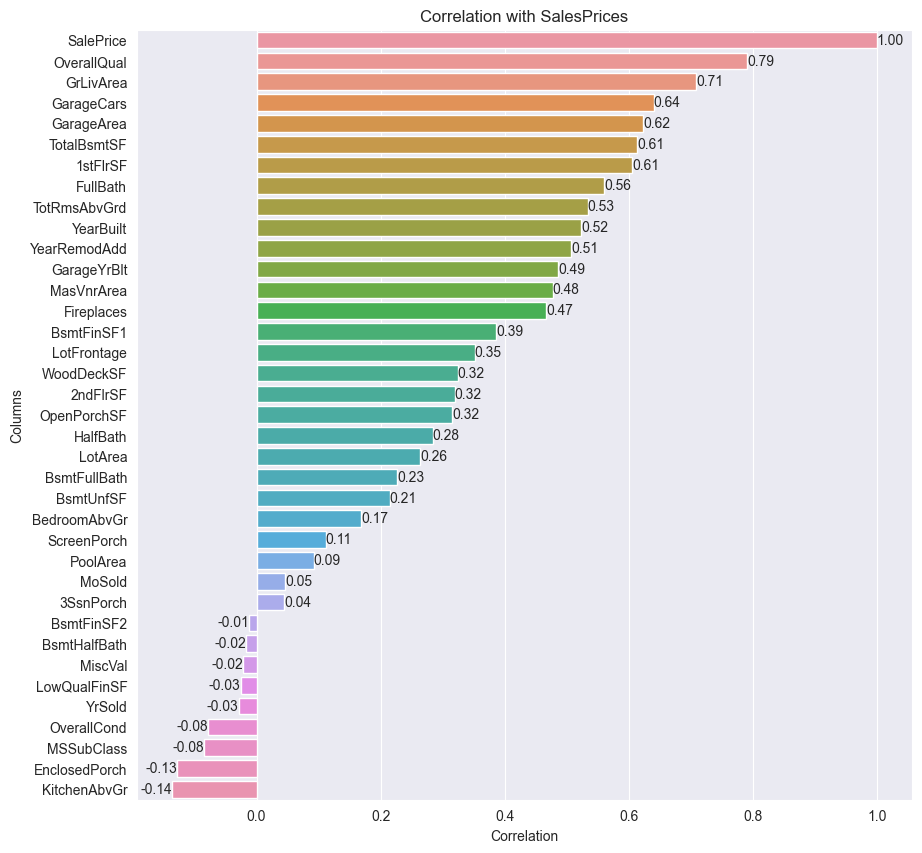

In [19]:
plt.figure(figsize = (10, 10))
ax = sns.barplot(x = correlation.values, y = correlation.index)
ax.set(ylabel = "Columns", xlabel = "Correlation", title = "Correlation with SalesPrices")
ax.bar_label(ax.containers[0], fontsize = 10, fmt = "%0.2f")
ax.tick_params(axis = "y", labelsize = 10)
plt.show()

In [20]:
top_corrs = correlation.head(16).index.to_list()
top_corrs.remove("SalePrice")

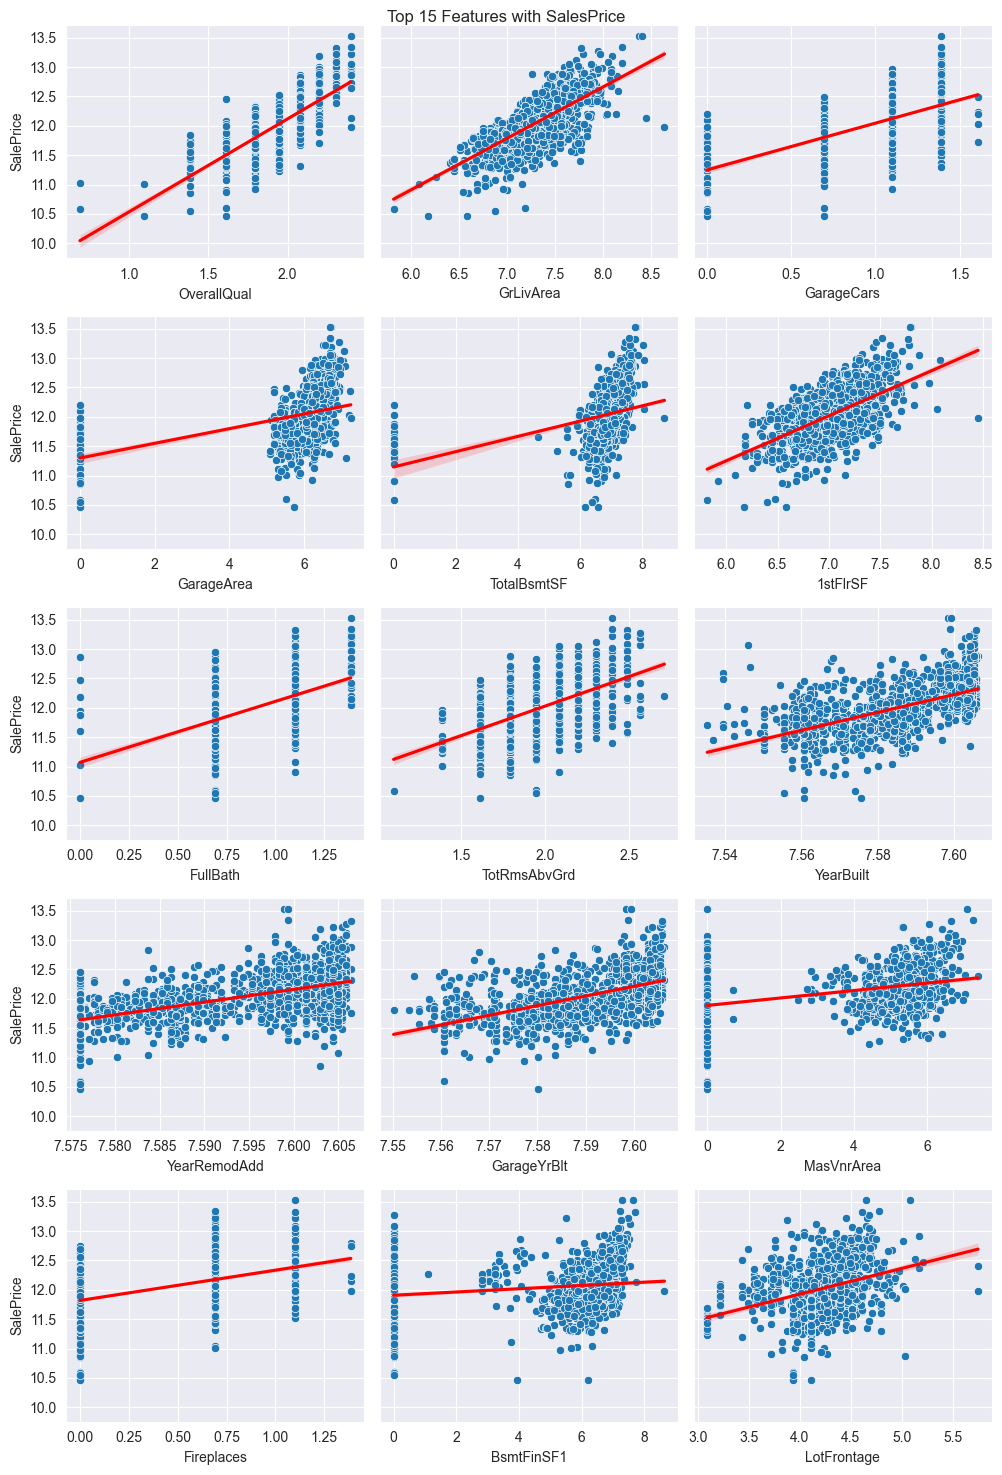

In [21]:
fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (10, 15), sharey = True)
sale_price_log = np.log1p(df_num["SalePrice"])

for i, top_corr in enumerate(top_corrs):
    row = i // 3
    col = i % 3
    top_corr_log = np.log1p(df_num[top_corr])
    sns.scatterplot(ax = axes[row][col], x = top_corr_log, y = sale_price_log)
    sns.regplot(ax = axes[row][col], x = top_corr_log, y = sale_price_log, scatter = False, color = "red")

plt.suptitle(f"Top {len(top_corrs)} Features with SalesPrice")
plt.tight_layout()
plt.show()

# Data Preprocessing

In [22]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [23]:
def convert_dtype(df: pd.DataFrame, cols: list, dtype: str) -> pd.DataFrame:
    df[cols] = df[cols].astype(dtype)
    return df

In [24]:
def fill_na(df: pd.DataFrame, num_features: list, cat_features: list) -> pd.DataFrame:
    _, cat_null_cols = check_null(df[cat_features])
    _, num_null_cols = check_null(df[num_features])
    
    df[cat_null_cols] = df[cat_null_cols].fillna("None")
    
    for col in num_null_cols:
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)
    
    return df

In [25]:
to_str_cols = ["OverallQual", "OverallCond", "MSSubClass"]
df_train = convert_dtype(df_train, to_str_cols, "str")
df_test = convert_dtype(df_test, to_str_cols, "str")

In [26]:
numerical_features = df_train.select_dtypes(include = ["int64", "float64"]).columns.to_list()
numerical_features.remove("SalePrice")
categorical_features = df_train.select_dtypes(include = ["object"]).columns.to_list()

df_train = fill_na(df_train, numerical_features, categorical_features)
df_test = fill_na(df_test, numerical_features, categorical_features)

In [27]:
selected_features = ["OverallCond", "OverallQual", "GrLivArea", "MSZoning"]

In [28]:
X = df_train[selected_features]
y = df_train["SalePrice"]

In [29]:
num_features = X.select_dtypes(include = ["int64", "float64"]).columns.to_list()
cat_features = X.select_dtypes(include = ["object"]).columns.to_list()

numerical_pipe = Pipeline(
    steps = [
        ("log_transform", FunctionTransformer(np.log1p)),
        ("scaler", StandardScaler())
    ]
)

categorical_pipe = Pipeline(
    steps = [
        ("label_encode", OneHotEncoder(handle_unknown = "ignore"))
    ]
)

preprocessor = ColumnTransformer(
    transformers = [
        ("num", numerical_pipe, num_features),
        ("cat", categorical_pipe, cat_features)
    ]
)
X = preprocessor.fit_transform(X)

print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (1460, 25), y shape: (1460,)


# Model Training

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = RAND_STATE_VALUE)
model = LinearRegression()
model.fit(X_train, y_train)
print(f"R^2 score: {model.score(X_test, y_test): .4f}")

R^2 score:  0.7470


In [32]:
model_pipe = Pipeline(
    steps = [
        ("preprocessor", preprocessor),
        ("model", model)
    ]
)

## Model Evaluation

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [34]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [35]:
linear_metric = pd.DataFrame({
    "metric": ["MAE", "MSE", "RMSE", "R^2"],
    "value": [mae, mse, rmse, r2]
})
linear_metric

,metric,value
0,MAE,2.621850e+04
1,MSE,1.717392e+09
2,RMSE,4.144143e+04
3,R^2,7.470328e-01


# Test Model Pipeline

In [36]:
sale_price_pred = model_pipe.predict(df_test[selected_features])
test_pred_df = pd.DataFrame({
    "Id": df_test["Id"],
    "SalePrice": sale_price_pred
})
test_pred_df.head(10)

,Id,SalePrice
0,1461,89291.092664
1,1462,161504.272535
2,1463,165039.337656
3,1464,177946.026821
4,1465,243253.379966
5,1466,179664.091936
6,1467,159438.172731
7,1468,169002.905479
8,1469,191294.344215
9,1470,107353.873629


# Export Model

In [37]:
import os
import joblib

In [38]:
model_path = "./models/"
model_filename = "house-price-regression.pkl"
file_loc = os.path.join(model_path, model_filename)

joblib.dump(model_pipe, file_loc)

print(f"Model saved to {file_loc}")

Model saved to ./models/house-price-regression.pkl
